In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from scipy.integrate import quad

Numeric Integration
===================

In [12]:
I, err = quad(lambda x : x**4+1, 0, 4)
print(I)
print(err)

208.8
2.318145675417327e-12


Interpolation
=============

In [13]:
from scipy.interpolate import interp1d

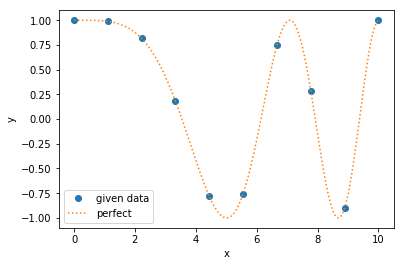

In [14]:
x_given = np.linspace(0, 10, 10)
y_given = np.cos(x_given**2.0/8.0)

xx = np.linspace(0, 10, 1000)
yy = np.cos(xx**2.0/8.0)
plt.plot(x_given, y_given, 'o', label='given data')
plt.plot(xx, yy, ':', label='perfect')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

In [15]:
    x_i = np.linspace(0, 10, 100) # interpolate to these points

    #------ linear interpolation
    f_linear = interp1d(x_given, y_given) # get interpolation function
    y_il = f_linear(x_i) # interpolate to y_i at x_i

    #------ spline interpolation
    f_spline = interp1d(x_given, y_given, kind='cubic')
    y_is = f_spline(x_i)

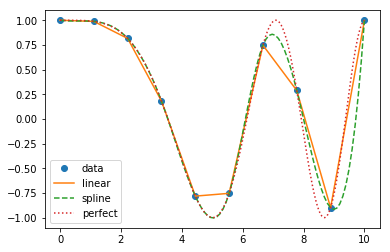

In [16]:
    plt.plot(x_given, y_given, 'o')
    plt.plot(x_i, y_il, '-')
    plt.plot(x_i, y_is, '--')
    plt.plot(xx, yy, ':')
    plt.legend(['data', 'linear', 'spline', 'perfect'], loc='best')

Curve Fitting
=============

Polynomial Curve Fitting
------------------------

Polynomial coefficients for x^3, x^2, x^1 and x^0: [ 0.08703704 -0.81349206  1.69312169 -0.03968254]


(-2, 2)

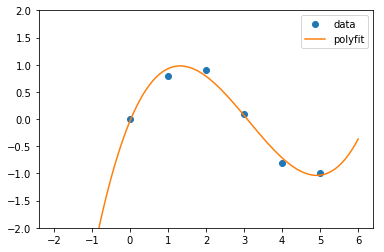

In [24]:
x_given = np.array([0., 1., 2., 3., 4., 5.])
y_given = np.array([0., 0.8, 0.9, 0.1, -0.8, -1.0])
x_p = np.linspace(-2.0, 6.0, 100) # x data for plotting the poly fit
p3 = np.polyfit(x_given, y_given, 3) # polynomial object of order 3
print('Polynomial coefficients for x^3, x^2, x^1 and x^0:', p3)
y_p = np.polyval(p3, x_p)

plt.plot(x_given, y_given, 'o')
plt.plot(x_p, y_p, '-')
plt.legend(['data', 'polyfit'], loc='best')
plt.ylim(-2, 2)


General Curve Fitting
---------------------
Adjust the parameters a, b, c of a function so they match a curve as good as possible.

a=2.45473, b=1.28643, c=0.51837


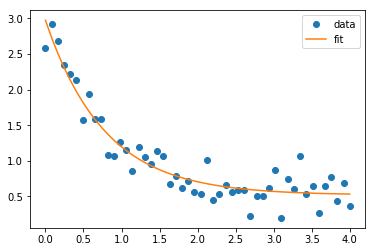

In [28]:
from scipy.optimize import curve_fit

# function f(x) whose parameters a, b, c we want to tune
def f(x, a, b, c):
    return a*np.exp(-b * x) + c

# 50 data points based on exact function, but randomly off a bit
x_given = np.linspace(0, 4, 50)
y_given = f(x_given, 2.5, 1.3, 0.5) + 0.2* np.random.normal(size=len(x_given))

# curve fit
params, extras = curve_fit(f, x_given, y_given)

print("a=%g, b=%g, c=%g" %(params[0], params[1], params[2]))

plt.plot(x_given, y_given, 'o')
plt.plot(x_given, f(x_given, params[0], params[1], params[2]))
plt.legend(['data', 'fit'], loc='best')
